In [1]:
%matplotlib inline

import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [2]:
data = pd.read_csv('trip.csv')

In [4]:
print(len(data))
data.head()

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [7]:
data = data.sort_values(by='starttime')
data.reset_index()
print ('Date range of dataset: %s - %s'%(data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


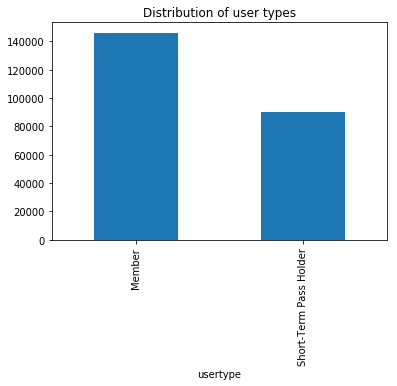

In [8]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of user types')

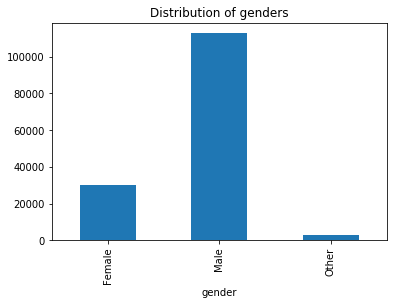

In [9]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

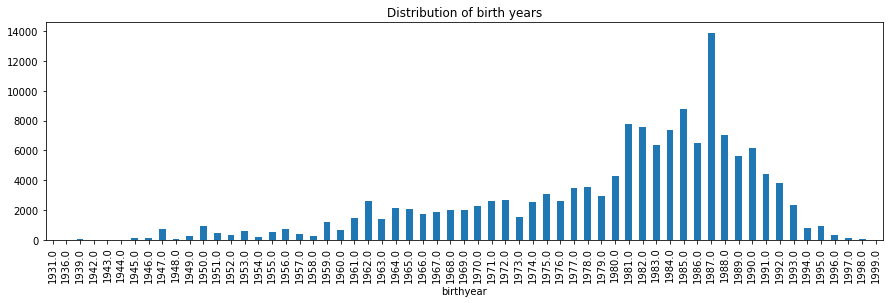

In [10]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years', figsize = (15,4))

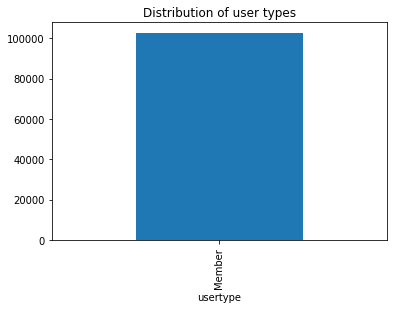

In [11]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear']<=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distribution of user types')

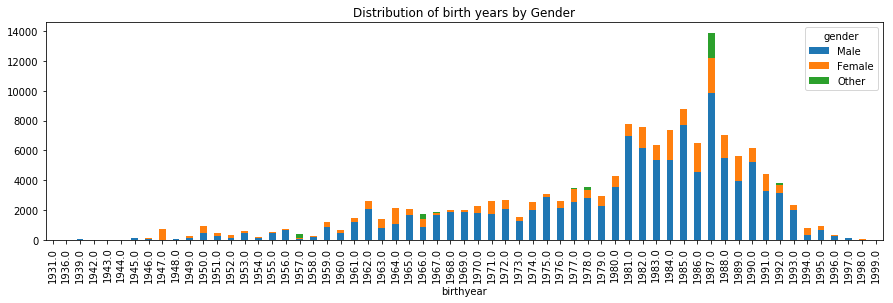

In [13]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of birth years by Gender', stacked=True, figsize = (15,4))


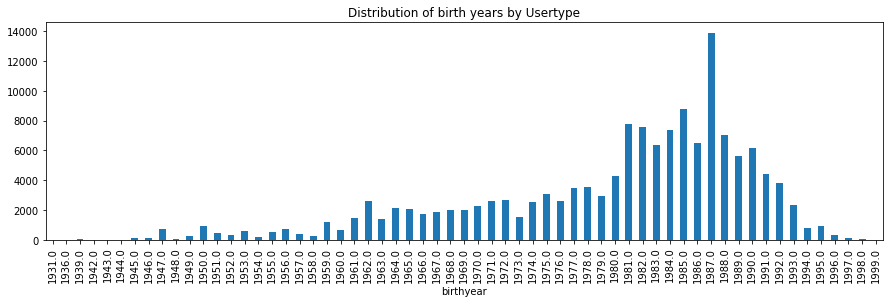

In [14]:
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user['Member'].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

In [34]:
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

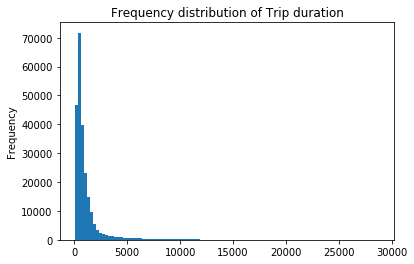

In [17]:
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

In [36]:
List_ = list(data['starttime'])

List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

In [27]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print ('Mean of trip duration: %f'%statistics.mean(trip_duration))
print ('Median of trip duration: %f'%statistics.median(trip_duration))
print ('Mode of station originating from: %s'%statistics.mode(station_from))

Mean of trip duration: 1202.612210
Median of trip duration: 633.235000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


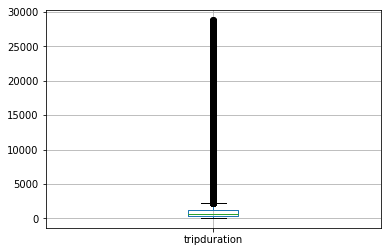

In [19]:
box = data.boxplot(column=['tripduration'])
plt.show()

In [28]:
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print ('Proportion of values as outlier: %f percent'%((len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 9.548218 percent


In [29]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print ('Mean of trip duration: %f'%mean_trip_duration)

Mean of trip duration: 711.726573


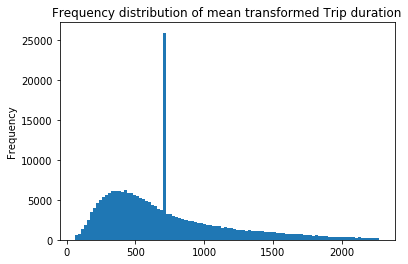

In [30]:
def transform_tripduration(x):
    
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))

data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

In [31]:
print ('Mean of trip duration: %f'%data['tripduration_mean'].mean())
print ('Standard deviation of trip duration: %f'%data['tripduration_mean'].std())
print ('Median of trip duration: %f'%data['tripduration_mean'].median())

Mean of trip duration: 711.726573
Standard deviation of trip duration: 435.517297
Median of trip duration: 633.235000


In [40]:
data = data.dropna()
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
data['age'] = data['starttime_year'] - data['birthyear']
correlations = data[['tripduration','age']].corr(method='pearson')
print(correlations)



              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


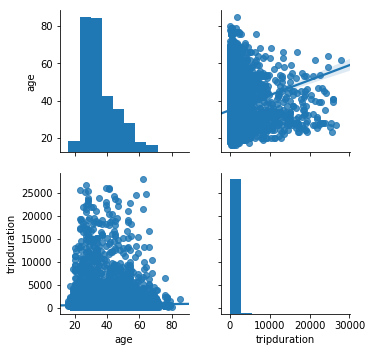

In [39]:
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg')
plt.show()

In [41]:
for cat in ['gender','usertype']:
    print ('Category: %s\n'%cat)
    groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)

    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:
        print ('%s %s'%(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print ('Statistic: %f, P value: %f'%(t_statistics.statistic, t_statistics.pvalue))
        print ('\n')

Category: gender

Female Male
Statistic: -38.573753, P value: 0.000000


Female Other
Statistic: 48.234386, P value: 0.000000


Male Other
Statistic: 53.180282, P value: 0.000000


Category: usertype



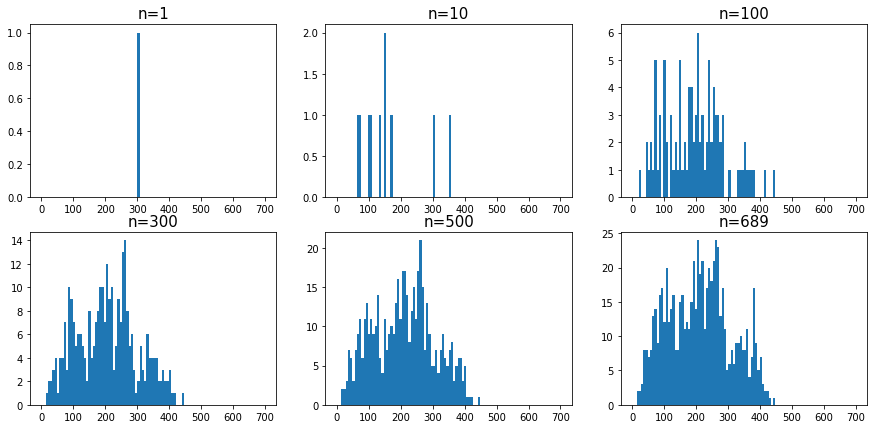

In [44]:
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1

random.shuffle(daily_tickets)

plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,700,101))

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())

    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2,3,plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' % (i+1),fontsize=15)        
        plot_count+=1

    if not daily_tickets:
        break
        
plt.show()